In [3]:
import matplotlib
matplotlib.use('agg')
%pylab inline
import seaborn; seaborn.set_style('whitegrid')
from avocado import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
all_data = training_set + validation_set + test_set

In [3]:
celltype_set, assay_set = [], []
for celltype, assay in all_data:
    if celltype not in celltype_set:
        celltype_set.append(celltype)
    if assay not in assay_set:
        assay_set.append(assay)

assay_count = {}
for _, assay in all_data:
    if assay in assay_count:
        assay_count[assay] += 1
    else:
        assay_count[assay] = 1

idxs = numpy.argsort(assay_count.values())[::-1]

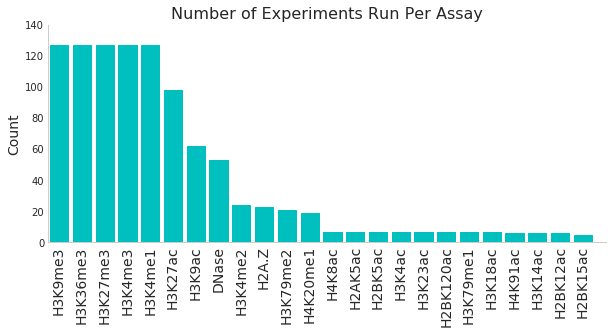

In [4]:
plt.figure(figsize=(10, 4), facecolor='w')
plt.title("Number of Experiments Run Per Assay", fontsize=16)
plt.bar(range(len(assay_count)), numpy.array(assay_count.values())[idxs], color='c', edgecolor='c', align='center')
plt.xticks(range(len(assay_count)), numpy.array(assay_count.keys())[idxs], rotation=90, fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xlim(-0.5, 24)
plt.ylim(0, 140)
plt.grid(False)
seaborn.despine()

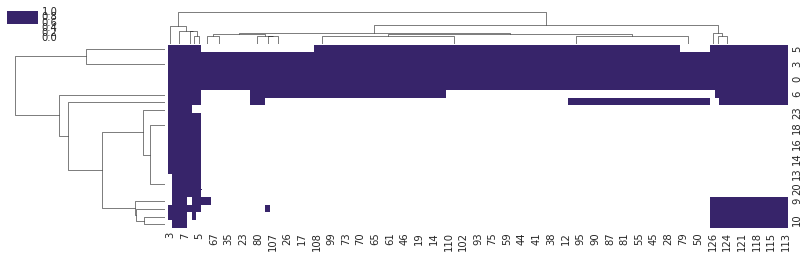

In [5]:
matrix = numpy.zeros((len(celltypes), len(assays)))

for celltype, assay in all_data:
    i = celltypes.index(celltype)
    j = assays.index(assay)
    matrix[i, j] = 1

seaborn.clustermap(matrix.T, figsize=(14, 4), facecolor='w', cmap=[(1, 1, 1), (55./255, 36./255, 106./255)])
#plt.savefig("data_map.pdf")

In [6]:
[assay for assay in assays if assay not in assay_count]

[]

In [7]:
126*23

2898

In [8]:
982. / 2898

0.3388543823326432

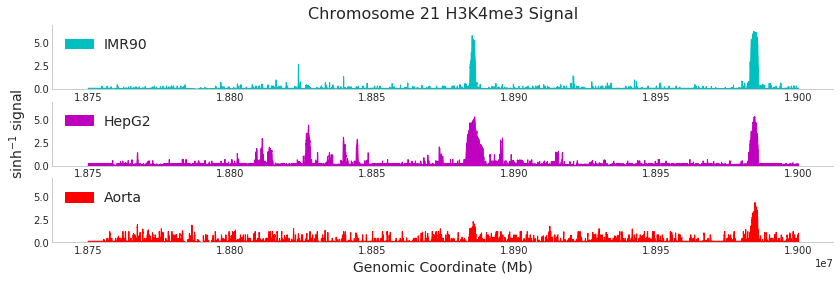

In [9]:
a = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E017.H3K4me3.chr21.arcsinh.npy', mmap_mode='r')
b = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E118.H3K4me3.chr21.arcsinh.npy', mmap_mode='r')
c = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E065.H3K4me3.chr21.arcsinh.npy', mmap_mode='r')

start, end = 750000, 760000
x = numpy.arange(start/.04, end/.04, 1/.04)

plt.figure(figsize=(14, 4), facecolor='w')
plt.subplot(311)
plt.title("Chromosome 21 H3K4me3 Signal", fontsize=16)
plt.fill_between(x, 0, a[start:end], color='c', label="IMR90")
plt.ylim(0, 7)
plt.grid(False)
plt.legend(fontsize=14, loc=2)
seaborn.despine()

plt.subplot(312)
plt.fill_between(x, 0, b[start:end], color='m', label="HepG2")
plt.ylim(0, 7)
plt.grid(False)
plt.ylabel("sinh$^{-1}$ signal", fontsize=14)
plt.legend(fontsize=14, loc=2)
seaborn.despine()

plt.subplot(313)
plt.fill_between(x, 0, c[start:end], color='r', label="Aorta")
plt.ylim(0, 7)
plt.grid(False)
seaborn.despine()
plt.xlabel("Genomic Coordinate (Mb)", fontsize=14)
plt.legend(fontsize=14, loc=2)
plt.savefig("same_mark.pdf")

In [10]:
a = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E004.H3K27me3.chr21.arcsinh.npy')
b = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E004.H3K36me3.chr21.arcsinh.npy')
c = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E004.DNase.chr21.arcsinh.npy')

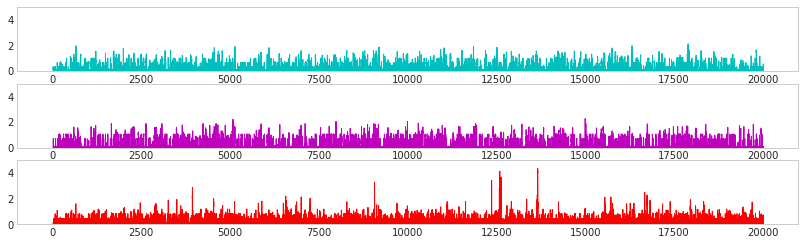

In [11]:
plt.figure(figsize=(14, 4))
plt.subplot(311)
plt.fill_between(range(20000), 0, a[1000000:1020000], color='c')
plt.ylim(0, 5)
plt.grid(False)

plt.subplot(312)
plt.fill_between(range(20000), 0, b[1000000:1020000], color='m')
plt.ylim(0, 5)
plt.grid(False)

plt.subplot(313)
plt.fill_between(range(20000), 0, c[1000000:1020000], color='r')
plt.ylim(0, 5)
plt.grid(False)
plt.savefig("same_celltype.pdf")

In [12]:
a = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E004.H3K4me3.chr1.arcsinh.npy')
b = numpy.load('/net/noble/vol5/user/jmschr/proj/avocado/predictions/ChromImpute/E004.H3K4me3.chr1.imputed.npz')['arr_0']
c = numpy.load('/net/noble/vol5/user/jmschr/proj/avocado/predictions/PREDICTD/E004.H3K4me3.chr1.predictd.npz')['arr_0']
d = numpy.load('/net/noble/vol5/user/jmschr/proj/avocado/predictions/avocado/E004.H3K4me3.chr1.avocado.npz')['arr_0']

In [13]:
def mse(x, y):
    return ((x - y) ** 2.).mean()
    

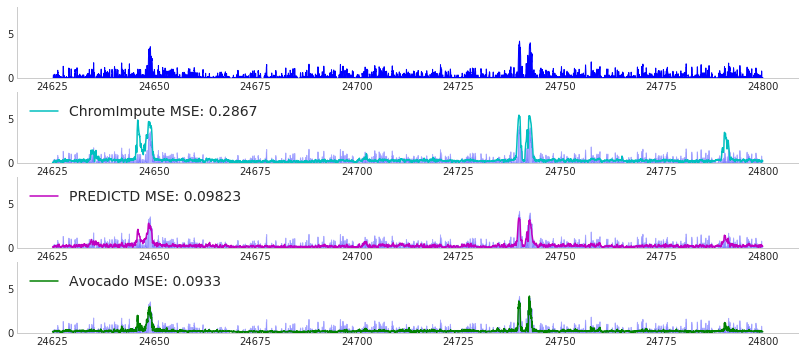

In [14]:
start, n = 985000, 7000
#start, n = 240000, 3000
#start, n = 1110000, 1500

x = numpy.arange(start*25./1000, (start+n)*25./1000, 25./1000)

plt.figure(figsize=(14, 6), facecolor='w')
plt.subplot(411)
x1 = a[start: start+n]
plt.fill_between(x, 0, x1, color='b')
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(412)
x2 = b[start: start+n]
plt.fill_between(x, 0, x1, color='b', alpha=0.3)
plt.plot(x, x2, color='c', label="ChromImpute MSE: {:4.4}".format(mse(x1, x2)))
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(413)
x3 = c[start: start+n]
plt.fill_between(x, 0, x1, color='b', alpha=0.3)
plt.plot(x, x3, color='m', label="PREDICTD MSE: {:4.4}".format(mse(x1, x3)))
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(414)
x4 = d[start: start+n]
plt.fill_between(x, 0, x1, color='b', alpha=0.3)
plt.plot(x, x4, color='g', label="Avocado MSE: {:4.4}".format(mse(x1, x4)))
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.savefig("comp.pdf")

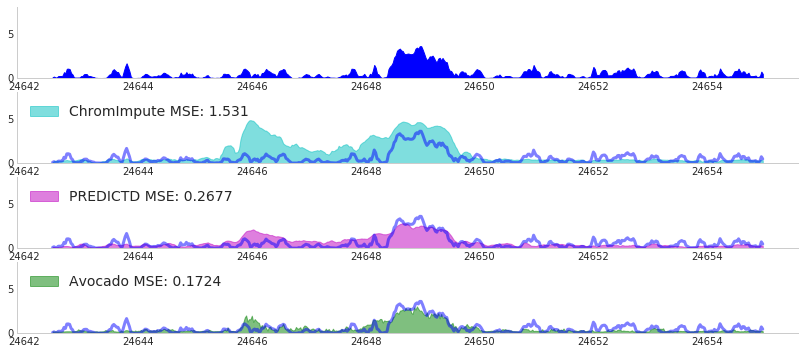

In [34]:
start, n = 985700, 500
#start, n = 240000, 3000
#start, n = 1110000, 1500

x = numpy.arange(start*25./1000, (start+n)*25./1000, 25./1000)

plt.figure(figsize=(14, 6), facecolor='w')
plt.subplot(411)
x1 = a[start: start+n]
plt.fill_between(x, 0, x1, color='b')
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(412)
x2 = b[start: start+n]
plt.fill_between(x, 0, x2, color='c', alpha=0.5, label="ChromImpute MSE: {:4.4}".format(mse(x1, x2)))
plt.plot(x, x1, color='b', linewidth=3, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(413)
x3 = c[start: start+n]
plt.fill_between(x, 0, x3, color='m', alpha=0.5, label="PREDICTD MSE: {:4.4}".format(mse(x1, x3)))
plt.plot(x, x1, color='b', linewidth=3, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(414)
x4 = d[start: start+n]
plt.fill_between(x, 0, x4, color='g', alpha=0.5, label="Avocado MSE: {:4.4}".format(mse(x1, x4)))
plt.plot(x, x1, color='b', linewidth=3, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

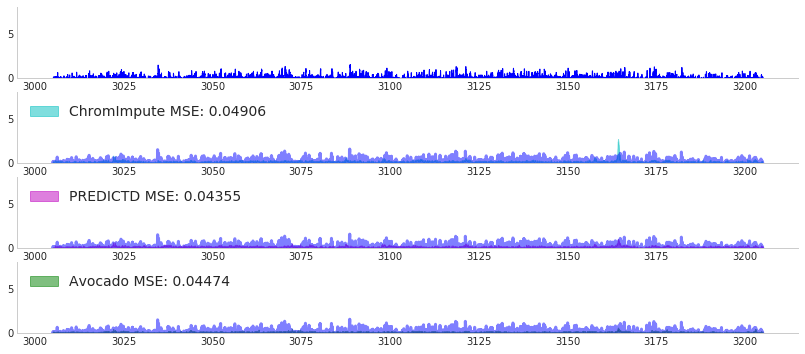

In [42]:
start, n = 120200, 8000
#start, n = 240000, 3000
#start, n = 1110000, 1500

x = numpy.arange(start*25./1000, (start+n)*25./1000, 25./1000)

plt.figure(figsize=(14, 6), facecolor='w')
plt.subplot(411)
x1 = a[start: start+n]
plt.fill_between(x, 0, x1, color='b')
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(412)
x2 = b[start: start+n]
plt.fill_between(x, 0, x2, color='c', alpha=0.5, label="ChromImpute MSE: {:4.4}".format(mse(x1, x2)))
plt.plot(x, x1, color='b', linewidth=3, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(413)
x3 = c[start: start+n]
plt.fill_between(x, 0, x3, color='m', alpha=0.5, label="PREDICTD MSE: {:4.4}".format(mse(x1, x3)))
plt.plot(x, x1, color='b', linewidth=3, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(414)
x4 = d[start: start+n]
plt.fill_between(x, 0, x4, color='g', alpha=0.5, label="Avocado MSE: {:4.4}".format(mse(x1, x4)))
plt.plot(x, x1, color='b', linewidth=3, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

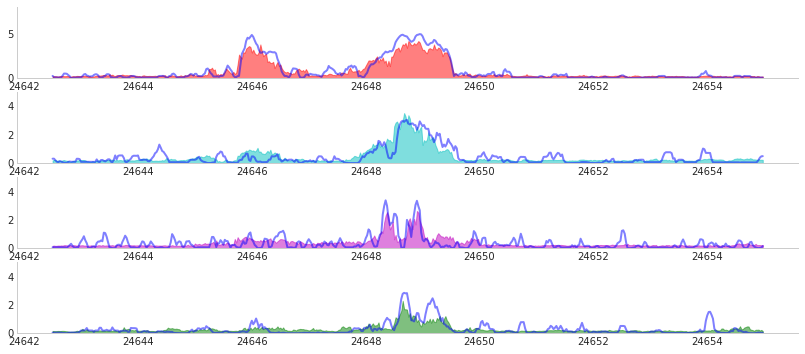

In [22]:
a1 = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E003.H3K4me3.chr1.arcsinh.npy', mmap_mode='r')
b1 = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E065.H3K4me3.chr1.arcsinh.npy', mmap_mode='r')
c1 = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E116.DNase.chr1.arcsinh.npy', mmap_mode='r')
d1 = numpy.load('/net/noble/vol4/noble/user/jmschr/proj/avocado/data/E017.H3K27ac.chr1.arcsinh.npy', mmap_mode='r')

a2 = numpy.load('/net/noble/vol5/user/jmschr/proj/avocado/predictions/avocado/E003.H3K4me3.chr1.avocado.npz', mmap_mode='r')['arr_0']
b2 = numpy.load('/net/noble/vol5/user/jmschr/proj/avocado/predictions/avocado/E065.H3K4me3.chr1.avocado.npz', mmap_mode='r')['arr_0']
c2 = numpy.load('/net/noble/vol5/user/jmschr/proj/avocado/predictions/avocado/E116.DNase.chr1.avocado.npz', mmap_mode='r')['arr_0']
d2 = numpy.load('/net/noble/vol5/user/jmschr/proj/avocado/predictions/avocado/E017.H3K27ac.chr1.avocado.npz', mmap_mode='r')['arr_0']



start, n = 985700, 500
#start, n = 240000, 3000
#start, n = 1110000, 1500

x = numpy.arange(start*25./1000, (start+n)*25./1000, 25./1000)

plt.figure(figsize=(14, 6), facecolor='w')
plt.subplot(411)
plt.fill_between(x, 0, a2[start:start+n], color='r', alpha=0.5)
plt.plot(x, a1[start:start+n], color='b', linewidth=2, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 8)
plt.grid(False)
seaborn.despine()

plt.subplot(412)
plt.fill_between(x, 0, b2[start:start+n], color='c', alpha=0.5)
plt.plot(x, b1[start:start+n], color='b', linewidth=2, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 5)
plt.grid(False)
seaborn.despine()

plt.subplot(413)
plt.fill_between(x, 0, c2[start:start+n], color='m', alpha=0.5)
plt.plot(x, c1[start:start+n], color='b', linewidth=2, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 5)
plt.grid(False)
seaborn.despine()

plt.subplot(414)
plt.fill_between(x, 0, d2[start:start+n], color='g', alpha=0.5)
plt.plot(x, d1[start:start+n], color='b', linewidth=2, alpha=0.5)
plt.legend(fontsize=14, loc=2)
plt.ylim(0, 5)
plt.grid(False)
seaborn.despine()